
                                                            PROJECT
                                                            2020-21
                             
                                                  Topic:-   Data of "Heart Failure Prediction"
                                                  Data:-    19-05-2021
                                                  Source:-  Kaggle


             Name:                                                                                         Guided by:
        Jayant Sathawane                                                                               Sneha Lohana mam


Import all required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Read Data from csv file

In [2]:
df=pd.read_csv("heart_failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

Analyzing the Datatypes 



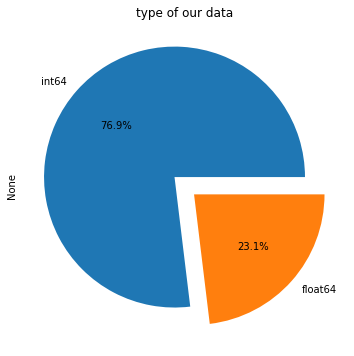

In [5]:
plt.figure(figsize=(6,6))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%')
plt.title('type of our data');
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Finding missing values

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data visualization

In [9]:
import seaborn as sns

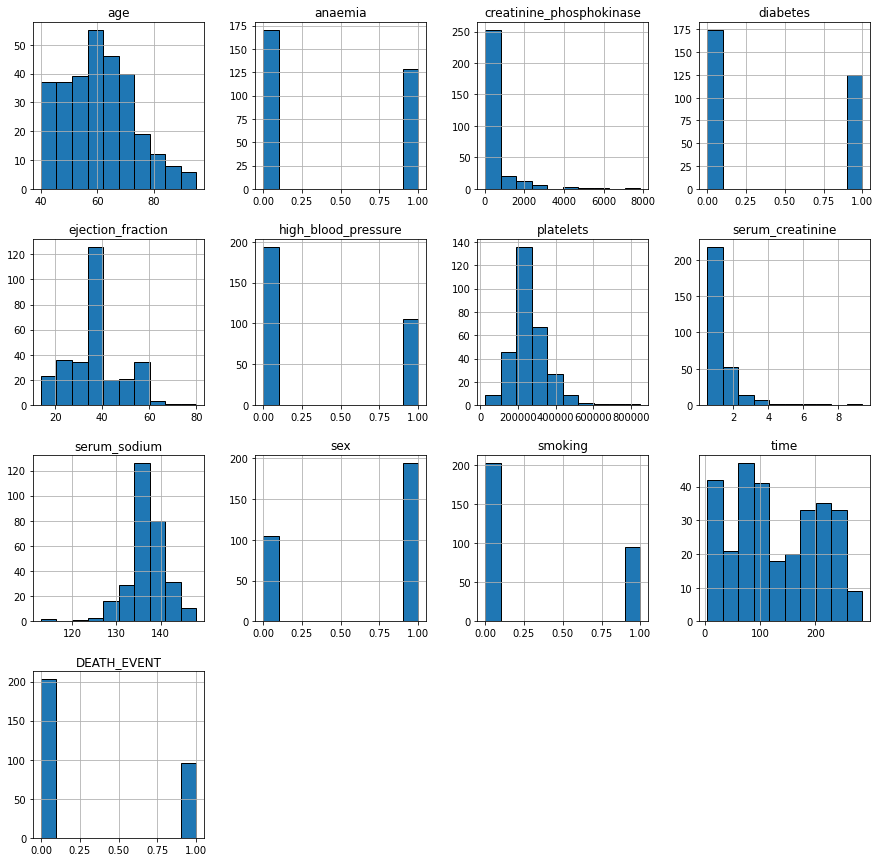

In [10]:
df.hist(figsize=(15,15),edgecolor='black');

Featuring Death Event

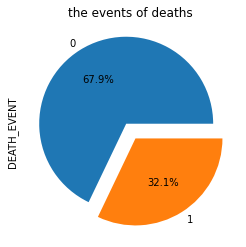

In [11]:
df.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%')
plt.title('the events of deaths');

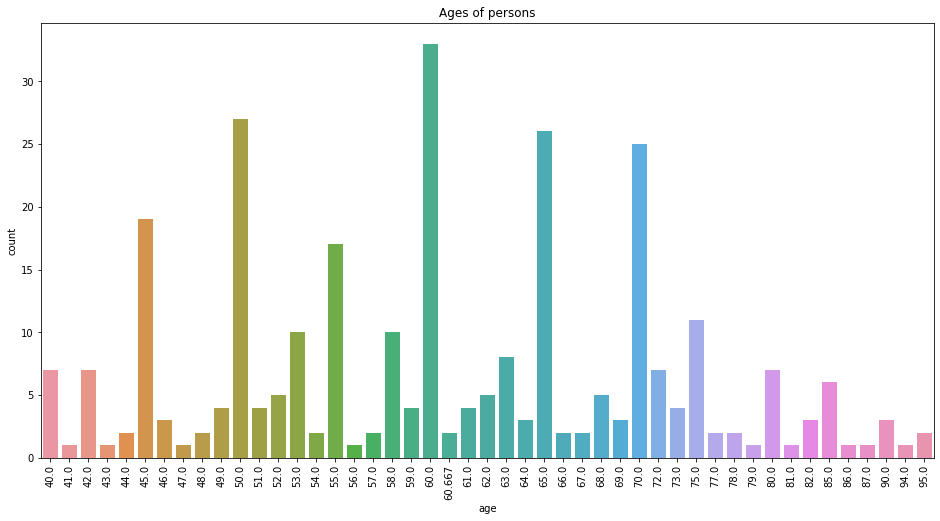

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,x="age")
plt.xticks(rotation=90)
plt.title('Ages of persons');


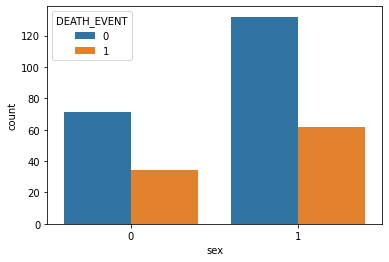

In [13]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=df);
# 0 for female, 1 for male


In [14]:
df=df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [15]:
df

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,20,1.9,130,4,1
1,38,1.1,136,6,1
2,20,1.3,129,7,1
3,20,1.9,137,7,1
4,20,2.7,116,8,1
...,...,...,...,...,...
294,38,1.1,143,270,0
295,38,1.2,139,271,0
296,60,0.8,138,278,0
297,38,1.4,140,280,0


Spliting data

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [45]:
x=df.drop('DEATH_EVENT',axis=1)
y=df.DEATH_EVENT

In [46]:
print(x.shape)
y.shape

(299, 4)


(299,)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Feature Scaling

In [48]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ANN (neural network )

In [49]:
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(7,activation="relu",input_shape=(x.shape[1],)),
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")]
)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 7)                 35        
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics = ['accuracy'],)

In [52]:
model_trained= model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6960
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6620
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6284
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.6715
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.6467
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.6541
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.6830
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7005
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.6836
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7020
Epoch 11/

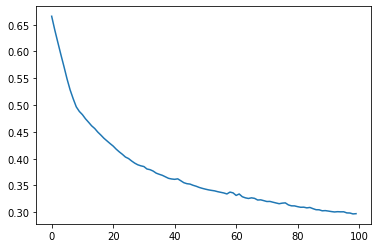

In [53]:
plt.plot(model_trained.history["loss"])
plt.show()

In [54]:
y_hat = model.predict(x_test)
y_hat

array([[1.34565234e-02],
       [8.89093757e-01],
       [5.13459146e-02],
       [9.27547753e-01],
       [3.05405855e-02],
       [1.38444990e-01],
       [1.52381629e-01],
       [8.81206930e-01],
       [3.34051251e-02],
       [1.29928291e-02],
       [6.82039559e-02],
       [2.61389315e-02],
       [8.85136724e-01],
       [8.72682035e-02],
       [8.99443030e-03],
       [8.49680007e-02],
       [2.26926506e-02],
       [5.58361948e-01],
       [2.65762210e-03],
       [1.73518479e-01],
       [1.35801584e-01],
       [8.77272487e-01],
       [8.85102212e-01],
       [2.45489478e-02],
       [5.01002491e-01],
       [3.40051293e-01],
       [6.08032346e-02],
       [4.35194433e-01],
       [4.22019660e-02],
       [5.40435314e-03],
       [9.41827893e-03],
       [4.73619044e-01],
       [4.96740937e-02],
       [1.69329554e-01],
       [3.35239768e-02],
       [8.81104887e-01],
       [5.35589457e-03],
       [3.04710567e-02],
       [1.32008195e-02],
       [2.11083889e-03],


In [55]:
print(max(y_hat))
print(min(y_hat))

[0.92754775]
[0.00022757]


In [56]:
y_hat1=np.where(y_hat>=0.5,1,0)

In [57]:
y_hat1.flatten()

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0])

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89        63
           1       0.81      0.63      0.71        27

    accuracy                           0.84        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.84      0.84      0.84        90

